##### NSL-KDD Training using Logistic Regression

In [12]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import pickle

In [13]:
#Importing the training and testing data 
pickle_in = open("X_train_rusb.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_rusb.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test_rusb.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test_rusb.pickle","rb")
y_test = pickle.load(pickle_in)

In [14]:
digit_train, counts_train = np.unique(y_train, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train)

{0: 297959, 1: 298078}


There is an imbalance in the data proportion contributed from each class. However after downsampling it is balanced

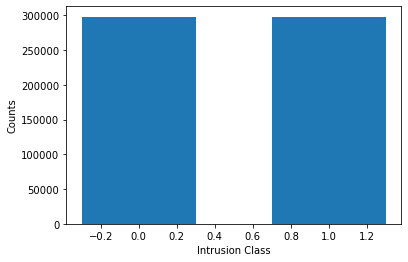

In [15]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.xlabel('Intrusion Class')
plt.ylabel('Counts')
plt.show()

In [18]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train.ravel())

c:\users\rathi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

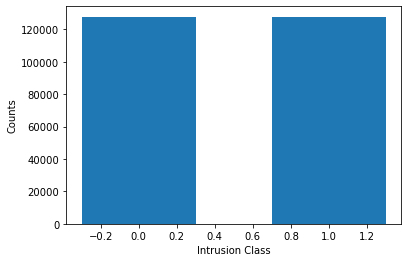

In [21]:
digit_test, counts_test = np.unique(y_test, return_counts = True)

distribution_test = dict(zip(digit_test, counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.xlabel('Intrusion Class')
plt.ylabel('Counts')
plt.show()

In [22]:
#Predicting the test dataset 
Y_test_pred1 = model.predict(X_test)

In [24]:
#Performance Evaluation
print("Train score is:", model.score(X_train, y_train))
print("Test score is:",model.score(X_test,y_test))

Train score is: 0.7944641020607781
Test score is: 0.7948208029125643


In [26]:
#Generating Confusion Matrix and Classification report
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(Y_test_pred1, y_test))
print('Classification Report')
print(classification_report(Y_test_pred1, y_test))

Confusion Matrix
[[111810  36440]
 [ 15972  91223]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.75      0.81    148250
           1       0.71      0.85      0.78    107195

    accuracy                           0.79    255445
   macro avg       0.79      0.80      0.79    255445
weighted avg       0.81      0.79      0.80    255445

